## Project Introduction: Palo Alto EV Charging Stations Usage And Other Related Factors

### Introduction:

The EV Charging Stations industry is expanding as people increasingly adopt electric vehicles for various reasons. Palo Alto stands out as one of the few cities equipped with EV charging stations to cater to the growing number of EV drivers. These charging stations have a significant impact on reducing greenhouse gas emissions, saving gasoline, and contributing to other positive environmental aspects. Moreover, EV charging stations prove to be profitable for business owners.

Importantly, the availability of charging stations does not necessarily equate to high costs, as many stations offer free charging services. Leveraging the dataset, our goal is to construct a model capable of predicting the benefits of charging stations for the city of Palo Alto. [Click here to access the dataset](https://www.kaggle.com/code/prasaddevh/eda-evchargingpaloaltoca)

**EDA Summary:**
Original Dataset has 32 columns with 259415 rows. All columns describe important aspect of charging stations located in Palo Alto City. 
If you are not familar with EV charging stations, it is required to know some of the terms like MAC. 

MAC address (Media Access Control address) is a unique identifier assigned to a network interface controller (NIC) for use as a network address in communications within a network segment. It is a hardware address that uniquely identifies each device on a network. 

There are two types of charging port. type 1 and type 2. type 1 charging port is slower than type 2 charging port but it is cheaper and some stations provide free service.

For further details on level 1 and level 2 Type 1 (J1772): This is a standard charging port in North America and Japan. It is also known as SAE J1772.
Type 2 (Mennekes): This is a standard charging port in Europe. It is also known as IEC 62196-2.

EVSE ID use to identify charging location, track, manage and record charging history. It is important column to record all previous charging histories.

Plug type is similar to Port Type. It refers to the type of connector/plug used by EV to connect to a charging station. Different electric vehicles and charging stations may use different plug types, and the choice of plug type depends on factors such as regional standards, vehicle compatibility, and charging infrastructure specifications. At the moment, there are 5 different types of plug/port type available. Most popular one is Tesla upercharger in Palo Alto.

In [3]:
#data manipulation
import numpy as np
import pandas as pd

#ploting
import matplotlib.pyplot as plt
import seaborn as sns

#statistical modeling
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime
from watermark import watermark
print(watermark(packages="numpy, pandas,matplotlib, seaborn,scipy,statsmodels"))

numpy      : 1.24.3
 pandas    : not installed
matplotlib : 3.7.2
 seaborn   : not installed
scipy      : 1.11.1
statsmodels: 0.14.0



In [4]:
df = pd.read_csv('/Users/stevekim/Desktop/BrainStationSprintProject/EVChargingStationUsageCali.csv')

/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_14814/927276920.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/stevekim/Desktop/BrainStationSprintProject/EVChargingStationUsageCali.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [4]:
print(df.head())

                 Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7

In [5]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

Column names are too long keep it short and neat

In [6]:
df.rename(columns={'Energy (kWh)' : 'Energy', 'GHG Savings (kg)': "GreenHouseGasSave",
                  'Transaction Date (Pacific Time)':'Transaction Date',
                   'Charging Time (hh:mm:ss)':'Charging Time',
                   'Total Duration (hh:mm:ss)': 'Total Duration',
                   'Gasoline Savings (gallons)': 'Gasoline Savings'
                  }, inplace=True)
print(df.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Country',
       'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')


In [7]:
df.drop_duplicates()
#Checked duplicate rows and decided to drop the rows.

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date,Total Duration,Charging Time,...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [8]:
df.head()
#MAC stands for Media Access Control address, MAC addresses are used as a way to uniquely identify a device on a network at the data link layer of the OSI model

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date,Total Duration,Charging Time,...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [9]:
df = df.drop(columns=['Country','State/Province','Currency'])

Drop columns:
Start Time Zone, End Time Zone. Report base on PDT no need to included in column
Country, State/Province. Report is base on California State no need to include country and state
Currency. No need to include currency 

In [10]:
#Write an utility function to perform basic data quality checks

def basic_check(df):
    """
    should return Number of rows, Number of columns, Missing values,
    Duplicated columns, Duplicated rows
    """
    
    #take a look at the shape of dataset
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')
    
    #take a look at the unique datatypes:
    print(f'Unique datatypes: {list(df.dtypes.unique())}')
    
    #check for missing values
    print(f'Missing values: {df.isnull().sum().any()}')
    
    #check for duplicates
    print(f'Duplicated columns: {df.T.duplicated().any()}')
    
    #row-level duplicates
    print(f'Duplicated rows: {df.duplicated().any()}')

In [11]:
#More sanity check
basic_check(df)

There are 259415 rows and 30 columns in the dataset.
Unique datatypes: [dtype('O'), dtype('float64'), dtype('int64')]
Missing values: True
Duplicated columns: False
Duplicated rows: True


In [12]:
df[df.duplicated] #this is okay therefore will not drop this rows

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date,Total Duration,Charging Time,...,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
32434,PALO ALTO CA / MPL #6,000D6F00015B7509,City of Palo Alto,2/25/2015 15:24,PST,2/25/2015 15:46,PST,2/25/2015 15:46,0:22:23,0:22:10,...,37.422138,-122.113457,0.00,Plug Out at Vehicle,469,95134.0,318799.0,NaN,NaN,NaN
108236,PALO ALTO CA / HIGH #2,0024:B100:0002:5959,City of Palo Alto,2/27/2017 11:14,PST,2/27/2017 14:17,PST,2/27/2017 14:17,3:02:42,2:33:45,...,37.443146,-122.163017,0.00,Plug Out at Vehicle,1488222853,94301.0,738281,Santa Clara County,1.640410e+11,CT4020-HD
109967,PALO ALTO CA / BRYANT #2,000D:6F00:009D:CFC3,City of Palo Alto,3/10/2017 14:07,PST,3/10/2017 15:53,PST,3/10/2017 15:53,1:46:01,1:24:31,...,37.446510,-122.162140,0.00,Customer,9453,94065.0,548777,Santa Clara County,1.023100e+11,CT2100-HD-CCR
206765,PALO ALTO CA / BRYANT #5,0024:B100:0002:6D51,City of Palo Alto,4/29/2019 8:10,PDT,4/29/2019 9:09,PDT,4/29/2019 9:10,0:59:06,0:57:54,...,37.446690,-122.162231,1.33,Plug Out at Vehicle,3413,94027.0,4516921.0,Santa Clara County,1.707410e+11,CT4020-HD


In [15]:
df.describe().T
#Univartriate Analysis
#This dataset contains only numerical values
#Summary statistic

,count,mean,std,min,25%,50%,75%,max
Energy,259415.0,8.544277e+00,7.185462e+00,1.000000e-02,3.784000e+00,6.868634e+00,1.145834e+01,9.736000e+01
GreenHouseGasSave,259415.0,3.588596e+00,3.017894e+00,4.000000e-03,1.589000e+00,2.885000e+00,4.813000e+00,4.089100e+01
Gasoline Savings,259415.0,1.072306e+00,9.017761e-01,1.000000e-03,4.750000e-01,8.620000e-01,1.438000e+00,1.221900e+01
Port Number,259415.0,1.591627e+00,4.915337e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
EVSE ID,180467.0,1.462973e+05,2.429677e+05,3.792000e+03,4.358300e+04,1.074270e+05,1.745590e+05,5.535441e+06
Postal Code,259415.0,9.430232e+04,1.941657e+00,9.430100e+04,9.430100e+04,9.430100e+04,9.430300e+04,9.430600e+04
Latitude,259415.0,3.743956e+01,9.621170e-03,3.742210e+01,3.742832e+01,3.744449e+01,3.744661e+01,3.744938e+01
Longitude,259415.0,-1.221513e+02,1.538203e-02,-1.221632e+02,-1.221622e+02,-1.221583e+02,-1.221457e+02,-1.221125e+02
Fee,259415.0,1.097481e+00,1.934408e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.640000e+00,8.456000e+01
Plug In Event Id,259415.0,1.188685e+08,4.057750e+08,1.000000e+00,1.573000e+03,3.573000e+03,6.340000e+03,1.609436e+09


In [16]:
#replace and fix grammar mistakes 
df['Station Name'] = df['Station Name'].str.replace('PALO ALTO CA /','')
df['Station Name'].value_counts()


Station Name
 HAMILTON #2        23721
 HAMILTON #1        14888
 WEBSTER #1         14432
 BRYANT #2          14389
 HIGH #4            13898
 BRYANT #1          13436
 WEBSTER #2         12669
 CAMBRIDGE #1       11163
 HIGH #1            10756
 WEBSTER #3         10484
 TED THOMPSON #1     9814
 CAMBRIDGE #2        9256
 MPL #6              8996
 HIGH #3             8317
 MPL #4              7787
 MPL #5              7544
 HIGH #2             6930
 RINCONADA LIB 3     6499
 RINCONADA LIB 1     6212
 BRYANT #6           5857
 RINCONADA LIB 2     5553
 BRYANT #5           5332
 CAMBRIDGE #5        4556
 CAMBRIDGE #3        4476
 BRYANT #3           4475
 BRYANT #4           3598
 CAMBRIDGE #4        3428
 TED THOMPSON #3     2455
 TED THOMPSON #4     2226
 TED THOMPSON #2     2217
 MPL #2              1535
 MPL #3              1420
 MPL #1              1044
 BRYANT # 1            13
 SHERMAN 3              8
 SHERMAN 1              7
 SHERMAN 2              4
 SHERMAN 4              4

In [17]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number'],
      dtype='object')

In [18]:
df['Station Name'] = df['Station Name'].replace({'BRYANT # 1': 'BRYANT #1'})

In [19]:
#replace and fix grammar mistakes
df['Address 1'] = df['Address 1'].replace({'Bryant St' : '445 Bryant St','528 High St.':'528 high st','500-532 Webster St':'532 Webster St'})

In [20]:
df['Address 1'].value_counts()

Address 1
445 Bryant St          47100
250 Hamilton Ave       38609
528 High St            37836
3700 Middlefield Rd    28326
520 Webster St         25173
475 Cambridge Ave      20230
275 Cambridge Ave      16712
400 Cambridge Ave      12649
532 Webster St         12382
1213 Newell Rd         12249
1520 Walnut Dr          3845
1514 Walnut Dr          2170
528 high st             2065
350 Sherman Ave           34
520 Cowper St             19
533 Cowper St             11
358 Sherman Ave            5
Name: count, dtype: int64

In [21]:

#Convert columns TotalDuration and charging time to seconds

df['Total Duration'] = pd.to_timedelta(df['Total Duration']).dt.total_seconds()
df['Charging Time'] = pd.to_timedelta(df['Charging Time']).dt.total_seconds()
df['TimeAfterCharged'] = (df['Total Duration'] - df['Charging Time']) / 60

#convert start year by year in order to calculate other necessary calculation
df['ByYear'] = pd.to_datetime(df['Start Date']).dt.year




In [22]:
df['Postal Code'].value_counts()

Postal Code
94301    163195
94306     49630
94303     46590
Name: count, dtype: int64

Postal codes 94301, 94303, and 94306, among California's wealthiest areas, are surrounded by notable attractions including Stanford University, nearby national parks, and cultural landmarks such as the Palo Alto Museum and Zoo.

In [23]:
df.groupby(['Address 1','Postal Code'])['Charging Time'].mean()/60
#Find the mean of charging time per address and postal code 
#convert back to minute for convenient readiblity

Address 1            Postal Code
1213 Newell Rd       94303          126.926699
1514 Walnut Dr       94303          111.107373
1520 Walnut Dr       94303          114.623853
250 Hamilton Ave     94301          122.241453
275 Cambridge Ave    94306          133.946119
350 Sherman Ave      94306          142.020588
358 Sherman Ave      94306          168.450000
3700 Middlefield Rd  94303          113.881894
400 Cambridge Ave    94306          120.582837
445 Bryant St        94301          121.911465
475 Cambridge Ave    94306           98.998435
520 Cowper St        94301          132.088596
520 Webster St       94301          126.352806
528 High St          94301          114.994926
528 high st          94301          120.384487
532 Webster St       94301          132.109344
533 Cowper St        94301          132.372727
Name: Charging Time, dtype: float64

In [24]:
avgTimeBy_St = df.groupby(['Station Name', 'Address 1'])['Charging Time'].mean() / 60
avgTimeBy_St.sort_values(ascending=False)
#changing it to minute 
#average charging time by station


Station Name      Address 1          
 SHERMAN 8        350 Sherman Ave        342.808333
 SHERMAN 7        358 Sherman Ave        192.383333
 SHERMAN 11       350 Sherman Ave        177.800000
 SHERMAN 1        350 Sherman Ave        175.871429
 SHERMAN 3        350 Sherman Ave        146.033333
 TED THOMPSON #2  275 Cambridge Ave      143.128695
 TED THOMPSON #1  275 Cambridge Ave      133.374890
 WEBSTER #2       532 Webster St         133.338010
 TED THOMPSON #4  275 Cambridge Ave      132.406020
 WEBSTER #3       533 Cowper St          132.372727
                  520 Cowper St          132.088596
 WEBSTER #1       532 Webster St         130.913187
 TED THOMPSON #3  275 Cambridge Ave      129.333707
 RINCONADA LIB 1  1213 Newell Rd         129.125982
 BRYANT #4        445 Bryant St          128.636900
 RINCONADA LIB 2  1213 Newell Rd         128.104617
 WEBSTER #1       520 Webster St         127.152807
 WEBSTER #2       520 Webster St         126.688653
 WEBSTER #3       520 Webs

Charging Station SHERMAN 8 350 Sherman Ave located Standford University. It has the highest average charging mean time

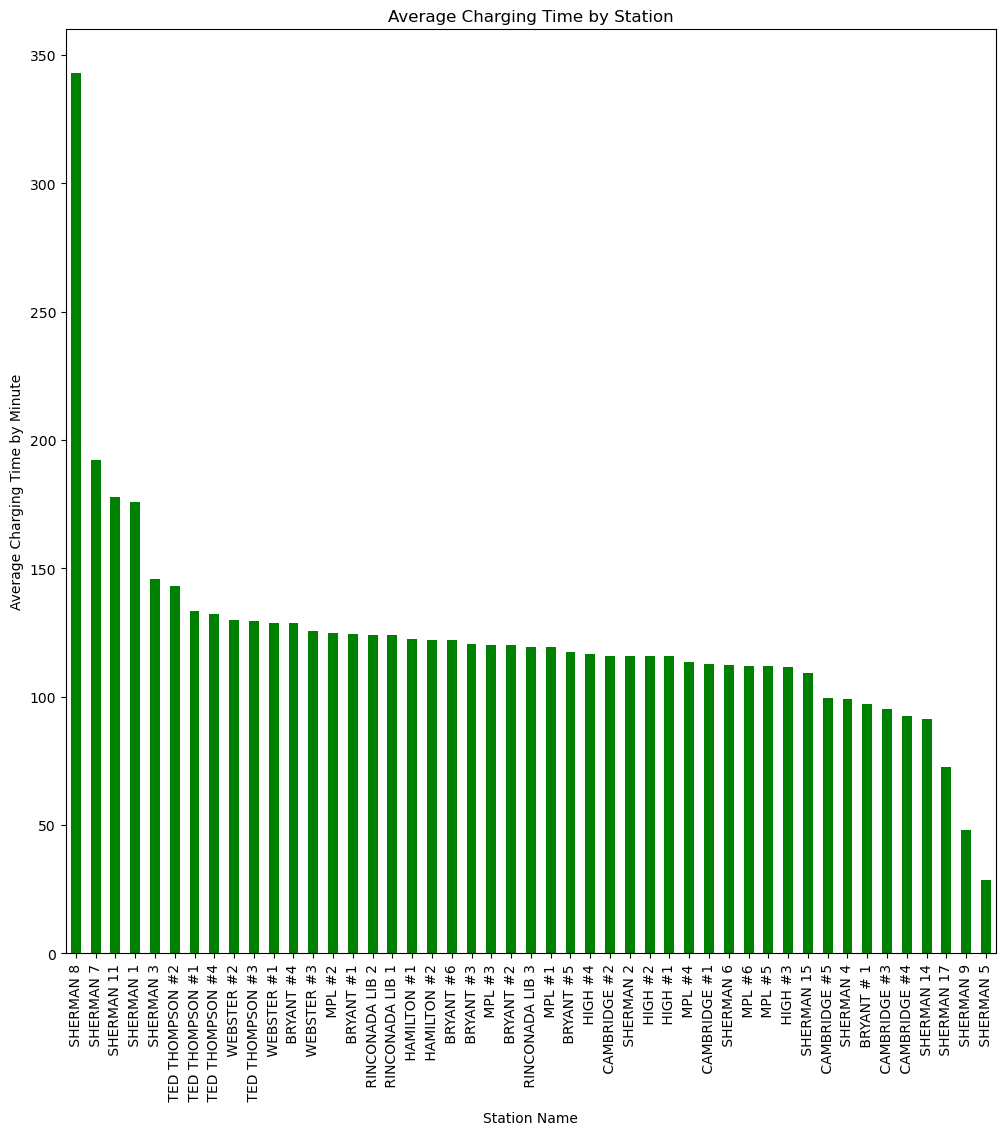

In [25]:
#create histogram to show 
plt.figure(figsize = (12,12))
avgPerStation = df.groupby('Station Name')['Charging Time'].mean()/60 #convert back to minute fore readablity
avgPerStations = avgPerStation.sort_values(ascending=False)
avgPerStations.plot(kind='bar', color='green')
plt.title('Average Charging Time by Station')
plt.xlabel('Station Name')
plt.ylabel('Average Charging Time by Minute')
plt.show()

Average time of Sherman 8 station is 342.808333 and address is 350 Sherman Ave.

Dec 20 EDA process


In [26]:
df['Station Name'] = df['Station Name'].str.replace('BRYANT # 1', 'BRYANT #1')

In [27]:
#Create column for overall fee for charging at the station
df['Total_Amount_For_Charging']  = df['Fee'] * df['Charging Time']

In [28]:
#I wanted to calculate the total amount but still need to work on it
total_amount_by_year = df.groupby(['Station Name', 'ByYear'])['Total_Amount_For_Charging'].sum() / df.groupby('Station Name')['ByYear'].nunique()
total_amount_by_year 

Station Name  ByYear
 BRYANT #1    2011      0.000000e+00
              2012      0.000000e+00
              2013      0.000000e+00
              2014      0.000000e+00
              2015      0.000000e+00
                            ...     
 WEBSTER #3   2016      0.000000e+00
              2017      3.270808e+06
              2018      8.311808e+06
              2019      1.016438e+07
              2020      5.872740e+06
Length: 204, dtype: float64

Total charging fee accumulate over 9 years

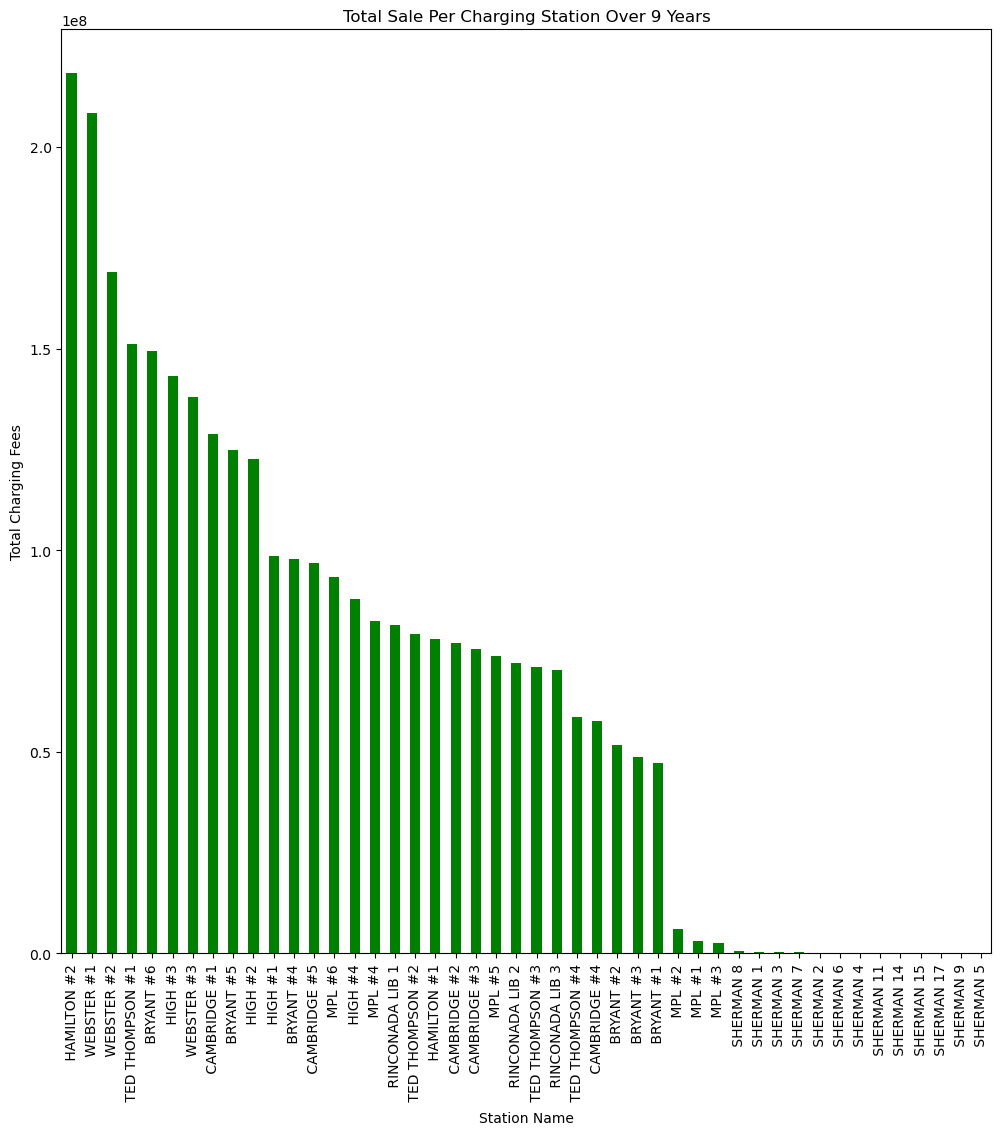

In [29]:
#create histogram and see which station has highest 
plt.figure(figsize=(12,12))
totalAmount = df.groupby('Station Name')['Total_Amount_For_Charging'].sum()
total_Amount = totalAmount.sort_values(ascending=False)
total_Amount.plot(kind='bar', color = 'green')
plt.title('Total Sale Per Charging Station Over 9 Years')
plt.xlabel('Station Name')
plt.ylabel('Total Charging Fees')
plt.show()

#Again break this down to month and year

In [30]:
#Display column names and cunt with Nulls
print(df[df == np.inf].count())

Station Name                 0
MAC Address                  0
Org Name                     0
Start Date                   0
Start Time Zone              0
End Date                     0
End Time Zone                0
Transaction Date             0
Total Duration               0
Charging Time                0
Energy                       0
GreenHouseGasSave            0
Gasoline Savings             0
Port Type                    0
Port Number                  0
Plug Type                    0
EVSE ID                      0
Address 1                    0
City                         0
Postal Code                  0
Latitude                     0
Longitude                    0
Fee                          0
Ended By                     0
Plug In Event Id             0
Driver Postal Code           0
User ID                      0
County                       0
System S/N                   0
Model Number                 0
TimeAfterCharged             0
ByYear                       0
Total_Am

In [31]:
df['County'].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [32]:
df['County'].isna().sum()

84665

In [34]:
#This is overall sum of fees on all stations and location
df.groupby(['Station Name','Address 1'])['Fee'].sum()
#Problem need to fix ask Stephen for further details

Station Name      Address 1          
 BRYANT #1        445 Bryant St           4533.72
 BRYANT #2        445 Bryant St           4990.83
 BRYANT #3        445 Bryant St           4405.75
 BRYANT #4        445 Bryant St           9128.43
 BRYANT #5        445 Bryant St          12248.09
 BRYANT #6        445 Bryant St          13823.15
 CAMBRIDGE #1     400 Cambridge Ave       2615.48
                  475 Cambridge Ave       9306.56
 CAMBRIDGE #2     400 Cambridge Ave       2380.50
                  475 Cambridge Ave       5477.47
 CAMBRIDGE #3     475 Cambridge Ave       7956.90
 CAMBRIDGE #4     475 Cambridge Ave       6476.15
 CAMBRIDGE #5     475 Cambridge Ave       9320.19
 HAMILTON #1      250 Hamilton Ave        7742.34
 HAMILTON #2      250 Hamilton Ave       20964.32
 HIGH #1          528 High St            10275.88
 HIGH #2          528 High St            12352.17
                  528 high st                0.00
 HIGH #3          528 High St            14752.21
            

In [51]:
#All the address location with free charging stations
df[df['Fee'] == 0]['Address 1'].unique()

array(['250 Hamilton Ave', '528 High St', '445 Bryant St',
       '3700 Middlefield Rd', '1520 Walnut Dr', '1514 Walnut Dr',
       '532 Webster St', '275 Cambridge Ave', '400 Cambridge Ave',
       '520 Webster St', '1213 Newell Rd', '528 high st', '533 Cowper St',
       '520 Cowper St', '475 Cambridge Ave'], dtype=object)

In [52]:
df[df['Fee']== 0]['Fee'].count()

133538

In [53]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number', 'TimeAfterCharged', 'ByYear',
       'Total_Amount_For_Charging'],
      dtype='object')

In [54]:
crossT = pd.crosstab(index = df['Station Name'], columns = df['Port Type'], values = df['Fee'],aggfunc = 'mean')

In [55]:
crossT

Port Type,Level 1,Level 2
Station Name,,
BRYANT #1,0.003362,0.379347
BRYANT #2,0.003227,0.383448
BRYANT #3,0.007059,1.011228
BRYANT #4,NaN,2.537084
BRYANT #5,NaN,2.297091
BRYANT #6,NaN,2.360108
CAMBRIDGE #1,NaN,1.067996
CAMBRIDGE #2,NaN,0.848960
CAMBRIDGE #3,NaN,1.777681


In [56]:
df[df['Fee'] > 0]['Station Name'].unique()

array([' CAMBRIDGE #2', ' HAMILTON #2', ' WEBSTER #1', ' HAMILTON #1',
       ' HIGH #3', ' RINCONADA LIB 1', ' MPL #5', ' WEBSTER #3',
       ' BRYANT #3', ' BRYANT #6', ' TED THOMPSON #1', ' CAMBRIDGE #1',
       ' MPL #4', ' MPL #3', ' HIGH #2', ' HIGH #4', ' BRYANT #5',
       ' BRYANT #4', ' HIGH #1', ' BRYANT #2', ' RINCONADA LIB 2',
       ' RINCONADA LIB 3', ' MPL #6', ' BRYANT #1', ' WEBSTER #2',
       ' MPL #2', ' MPL #1', ' CAMBRIDGE #5', ' TED THOMPSON #3',
       ' TED THOMPSON #4', ' TED THOMPSON #2', ' CAMBRIDGE #3',
       ' CAMBRIDGE #4', ' SHERMAN 6', ' SHERMAN 7', ' SHERMAN 9',
       ' SHERMAN 8', ' SHERMAN 4', ' SHERMAN 1', ' SHERMAN 3',
       ' SHERMAN 14', ' SHERMAN 2', ' SHERMAN 5', ' SHERMAN 15',
       ' SHERMAN 11', ' SHERMAN 17'], dtype=object)

In [57]:
df['Driver Postal Code'].value_counts()

Driver Postal Code
94301.0    25032
94303.0    22561
94306.0    21573
94025.0    11581
94043.0     7541
           ...  
92630.0        1
47906.0        1
6830.0         1
93536.0        1
63301.0        1
Name: count, Length: 985, dtype: int64

Text(0.5, 1.0, 'Charging Station Postal Code vs Driver Postal Code')

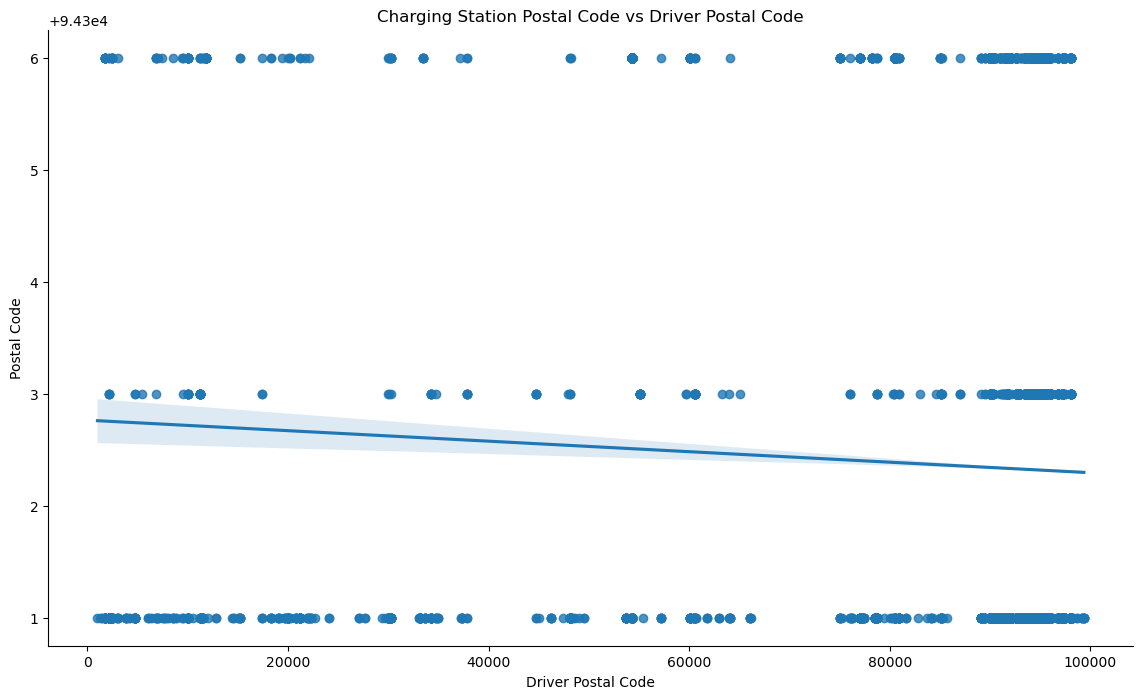

In [58]:
plt.figure(figsize=(14,8))
sns.regplot(x=df['Driver Postal Code'], y=df['Postal Code'])
sns.despine()
plt.title("Charging Station Postal Code vs Driver Postal Code")

Many NaN values on County 
Need to fill it up with actual county names

In [59]:
df['County'].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [60]:
df['County'].isna().sum()
#Problem I need to solve

84665

There are 84665 NaN values in County column

#GHG (Greenhouse Gas) savings, measured in kilograms (kg), refers to the reduction in the emission of greenhouse gases that would have occurred as a result of implementing a particular action, process, or technology



In [62]:
#ghg = df.groupby('Address 1')['GreenHouseGasSave'].sum().div(1000).reset_index().sort_values(by='GreenHouseGasSave', ascending=False).reset_index(drop=True)
#ghg

445 Bryant St is parking lot building where Tesla supercharger and other super charging stations available.	It saved ovearall 162.667532

In [63]:
gs = df.groupby('Address 1').agg({'Gasoline Savings': 'sum', 'ByYear': 'first'}).reset_index()
gs['Gasoline Savings'] = gs['Gasoline Savings'] / gs['ByYear']
gs = gs.sort_values(by=['ByYear', 'Gasoline Savings'], ascending=[True, False]).reset_index(drop=True)
gs
# Gas Saved goes by KG

,Address 1,Gasoline Savings,ByYear
0,445 Bryant St,24.170334,2011
1,528 High St,20.477242,2011
2,250 Hamilton Ave,19.062278,2011
3,3700 Middlefield Rd,15.267454,2014
4,532 Webster St,7.570594,2015
5,1520 Walnut Dr,1.952445,2015
6,1514 Walnut Dr,1.087224,2015
7,520 Webster St,15.044005,2016
8,275 Cambridge Ave,10.065208,2016
9,1213 Newell Rd,7.651955,2016


Year 2020 is lowest year in terms of gasoline savings because pandemic.

In [64]:
df['ByYear'] = pd.to_datetime(df['Start Date']).dt.year
#convert start year by year in order to calculate other necessary calculation

In [65]:
ghgby = df.groupby(['ByYear','Address 1'])['GreenHouseGasSave'].sum()
ghgby

ByYear  Address 1          
2011    250 Hamilton Ave        2423.841
        445 Bryant St            654.264
        528 High St              436.490
2012    250 Hamilton Ave        7818.865
        445 Bryant St           6970.995
                                 ...    
2020    3700 Middlefield Rd     7887.011
        445 Bryant St          10606.513
        475 Cambridge Ave      15686.857
        520 Webster St         13371.518
        528 High St            12705.758
Name: GreenHouseGasSave, Length: 70, dtype: float64

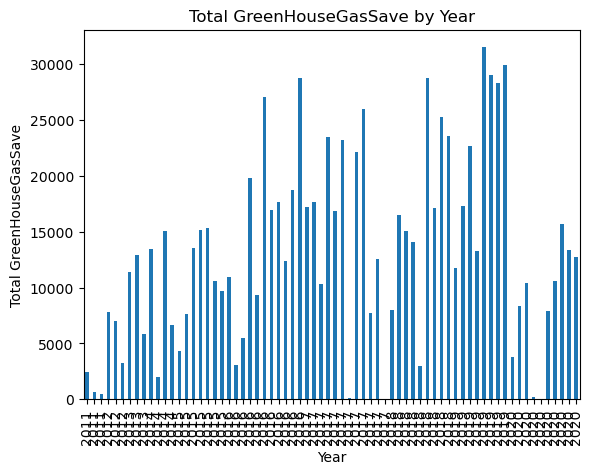

In [66]:
#GHG saved by address per year
ghgby_df = ghgby.reset_index()
ghgby_df.plot(kind='bar', x='ByYear', y='GreenHouseGasSave', legend=False)

plt.xlabel('Year')
plt.ylabel('Total GreenHouseGasSave')
plt.title('Total GreenHouseGasSave by Year')
plt.show()

In [67]:
postal_code = df.groupby(['ByYear','Postal Code'])['GreenHouseGasSave'].sum()
postal_code

ByYear  Postal Code
2011    94301            3514.595
2012    94301           18049.138
2013    94301           30198.590
2014    94301           35174.688
        94303            1948.712
2015    94301           49124.471
        94303           27090.959
2016    94301           97400.290
        94303           46577.974
        94306           26360.781
2017    94301          109405.967
        94303           40711.767
        94306           27229.489
2018    94301           94129.548
        94303           22051.946
        94306           35132.181
2019    94301          107105.650
        94303           25015.396
        94306           51711.271
2020    94301           45055.897
        94303           11631.173
        94306           26315.207
Name: GreenHouseGasSave, dtype: float64

In [68]:
ghg = df.groupby('Address 1').agg({'GreenHouseGasSave': 'sum', 'ByYear': 'first'}).reset_index()
ghg['GreenHouseGasSave'] = ghg['GreenHouseGasSave'] / ghg['ByYear']
ghg = ghg.sort_values(by=['ByYear', 'GreenHouseGasSave'], ascending=[True, False]).reset_index(drop=True)
print(ghg)
# GHG goes by KG

              Address 1  GreenHouseGasSave  ByYear
0         445 Bryant St          80.888877    2011
1           528 High St          68.529560    2011
2      250 Hamilton Ave          63.794180    2011
3   3700 Middlefield Rd          51.094332    2014
4        532 Webster St          25.335725    2015
5        1520 Walnut Dr           6.534065    2015
6        1514 Walnut Dr           3.638538    2015
7        520 Webster St          50.346534    2016
8     275 Cambridge Ave          33.684294    2016
9        1213 Newell Rd          25.608208    2016
10    400 Cambridge Ave          18.250204    2016
11          528 high st           3.827858    2017
12        520 Cowper St           0.034419    2017
13        533 Cowper St           0.023772    2017
14    475 Cambridge Ave          30.639570    2018
15      350 Sherman Ave           0.090359    2020
16      358 Sherman Ave           0.017725    2020


In [69]:
df['byWeek'] = pd.to_datetime(df['Start Date']).dt.day_name()
df['weekend'] = df['byWeek'].isin(['Saturday','Sunday'])
df['weekday'] = df['byWeek'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])

In [70]:
#usage of charging stations during week days and weekends
CT_by_week = df.groupby('byWeek')['Charging Time'].size().reset_index().sort_values(by='byWeek', ascending=False).reset_index(drop=True)
CT_by_week

,byWeek,Charging Time
0,Wednesday,40483
1,Tuesday,39578
2,Thursday,40189
3,Sunday,29626
4,Saturday,32264
5,Monday,36853
6,Friday,40422


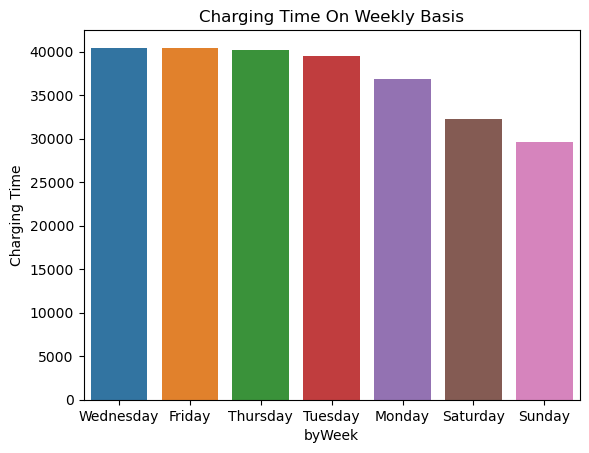

In [150]:
sns.barplot(data=CT_by_week, y ='Charging Time',x = 'byWeek',order=CT_by_week['byWeek'])
plt.title('Charging Time On Weekly Basis')
plt.show()

Possible trend is charge EV during Wednesday, Thursday and Friday and use it during Weekend and Monday.


In [153]:
#usage of charging stations during week days and weekends
CT_by_weekday = df.groupby('weekday')['Charging Time'].size().reset_index().sort_values(by='Charging Time', ascending=False).reset_index(drop=True)
CT_by_weekday.replace({True: 'Weekday', False: 'Weekend'})
CT_by_weekday

,weekday,Charging Time
0,True,197308
1,False,61858


Text(0.5, 1.0, 'Charging Time During Weekdays and Weekends')

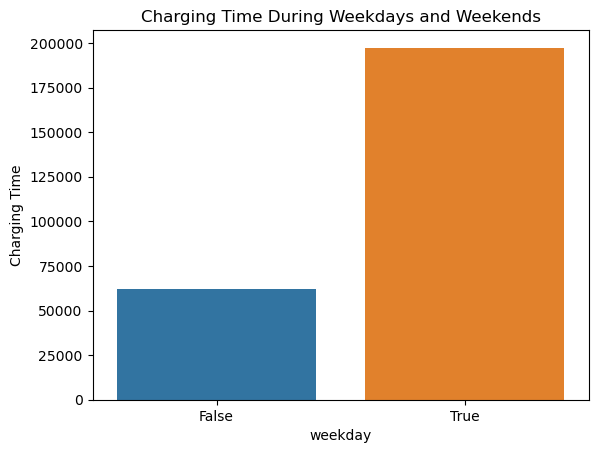

In [154]:
sns.barplot(data=CT_by_weekday, y ='Charging Time',x = 'weekday')
plt.title('Charging Time During Weekdays and Weekends')

In [135]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number', 'TimeAfterCharged',
       'Total_Amount_For_Charging', 'Transaction Date By year', 'ByYear',
       'byWeek', 'weekend', 'weekdays', 'weekday'],
      dtype='object')

In [71]:
#df.to_csv('output.csv', index=False)


#### Summary:
Overall, some columns have been dropped, and others have been adjusted for analysis purposes. The process is not yet complete, and further analysis will be conducted. The ultimate goal is to understand how each column impacts the others.